<a href="https://colab.research.google.com/github/nhatnguyen222/CawlDuLieuPorxy/blob/main/BaiTap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Nội dung 1 :**

 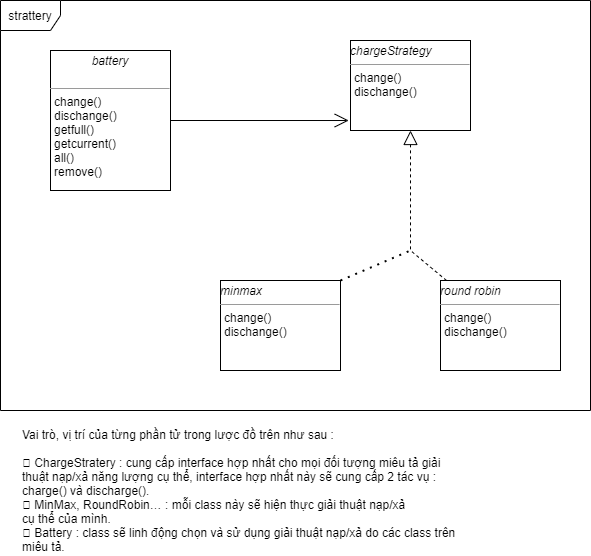

In [49]:
#đặc tả interface của mọi đối tượng miêu tả giải thuật nạp/xả năng lượng
#cho pin tích hợp
class IChargeStrategy :
 #tác vụ nạp điện cho phần tử tích hợp theo 1 chiến lược xác định
  def charge(elems) :
   pass
 #tác vụ thải điện khỏi phần tử tích hợp theo 1 chiến lược xác định
  def discharge(elems) :
    pass



In [50]:
#class miêu tả giải thuật nạp/xả năng lượng theo dạng xoay vòng
class StratRoundRobin(IChargeStrategy) :
  aCharger = -1 #thiết lập chỉ số battery đã nạp lần cuối
  aDecharger = -1 #thiết lập chỉ số battery đã thải lần cuối
  def charge(elems):
    #hiệu chỉnh chỉ số battery cần nạp
    aCharger = (aCharger + 1) % elems.Count
    return elems[aCharger].charge()
 
  def discharge(elems) :
   #hiệu chỉnh chỉ số battery cần thải
   aDecharger = (aDecharger + 1) % elems.Count
   return elems[aDecharger].charge()
 


In [51]:
#class miêu tả giải thuật nạp/xả năng lượng theo dạng Min-Max
class StratMinMax(IChargeStrategy) :
  def charge(elems) :
    cellmin = 0
    capamin = Int32.MaxValue
  #lặp tìm battery có công suất nhỏ nhất
    for c in elems : 
       capaCur = elems[c].getCurrentCapacity()
    if capaCur < capamin :
      cellmin = c
      capamin = capaCur
   #nạp 1u cho battery có công suất nhỏ nhất tìm được
    return elems[cellmin].charge()
 

In [52]:
#class miêu tả giải thuật nạp/xả năng lượng theo dạng Min-Max
class StratMinMax(IChargeStrategy) :
  def charge( elems):
   cellmin = 0
   capamin = Int32.MaxValue
 #lặp tìm battery có công suất nhỏ nhất
   for c in elems : 
    capaCur = elems[c].getCurrentCapacity()
    if capaCur < capamin :
     cellmin = c
     capamin = capaCur
 #nạp 1u cho battery có công suất nhỏ nhất tìm được
   return elems[cellmin].charge()
  def discharge(elems) :
   cellmax = 0
   capamax = Int32.MinValue
 #lặp tìm battery có công suất lớn nhất
   for c in elems :
    apaCur = elems[c].getCurrentCapacity()
    if capaCur > capamax :
     cellmax = c
     capamax = capaCur
 #thải 1u của battery có công suất lớn nhất tìm được
   return elems[cellmax].discharge()

 

In [53]:

#hoàn chỉnh class đặc tả đối tượng pin tích hợp
class Battery :

 #tác vụ khởi tạo battery tích hợp có nCells, mỗi cell có công suất capCells
 #dùng chiến lược nạp/thải được qui định bởi bycycles
 def Battery(nCells,capCells,bycycles) :
  for i in range(nCells) :
    elems.append(Cell(capCells))
  if (bycycles) : 
    myStrat =  StratRoundRobin()
  else :
    myStrat =  StratMinMax()
 #tác vụ thêm battery b vào battery hiện hành
 def gm_add( b) :
   elems.append(b) 
 #tác vụ bớt battery b ra khỏi battery hiện hành
 def gm_remove( b) :
   elems.remove(b)
 
 #tác vụ nạp 1u vào battery
 def charge() :
    return myStrat.charge(elems)
 #tác vụ thải 1u khỏi battery
 def discharge() :
    return myStrat.discharge(elems)
 
 #tác vụ tham khảo công suất hiện hành của battery
 def getCurrentCapacity() :
    sum = 0
    for  c in elems :
     sum += c.getCurrentCapacity()
    return sum
 #tác vụ tham khảo công suất max của battery
 def getFullCapacity() :
    sum = 0;
    for  c in elems :
      sum += c.getFullCapacity()
    return sum;
 #tác vụ giải mã trạng thái battery thành chuỗi
 def ToString() :
   buf = "["
   for  c in elems :
    buf += c + ", "
   return buf.Substring(0, buf.Length - 2) + "]" 
 
 

# **Nội dung 2 :**

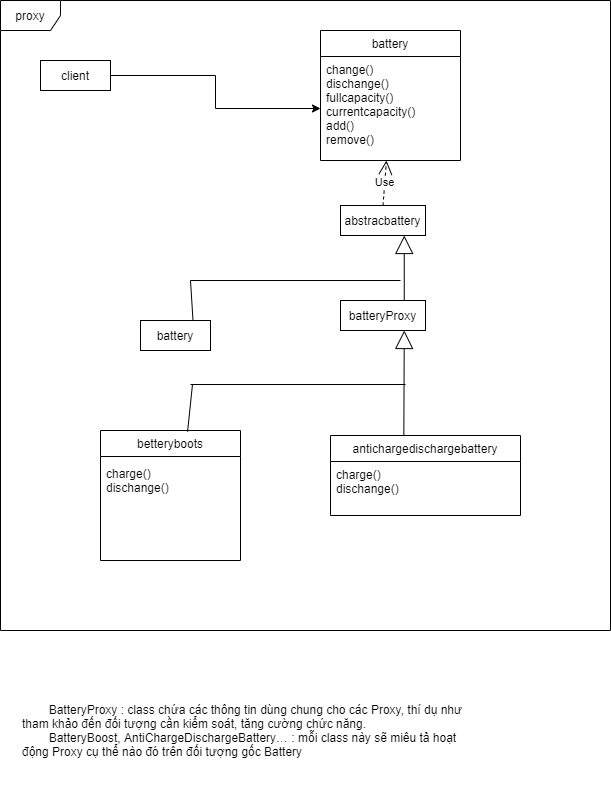

In [54]:
#đặc tả class chứa các thông tin chung của các proxy
class BatteryProxy :
  #tác vụ tham khảo công suất max của battery
 def getFullCapacity() :
  pass
 #tác vụ tham khảo công suất hiện hành của battery
 def getCurrentCapacity() :
  pass
 #tác vụ thải 1u khỏi battery
 def discharge() :
  pass
 #tác vụ nạp 1u vào battery
 def charge() :
  pass
 #tác vụ giải mã trạng thái battery thành chuỗi
 def ToString() :
  pass


In [55]:
class BatteryBoost(BatteryProxy) :
   doIt= True
   isEmpty = False
   def BatteryBoost(master)  :
       pass
 #tác vụ thải 1u khỏi battery
   def discharge() :
      if (isEmpty) :
        return false
      if (doIt) :
        isEmpty = base.discharge()
      doIt = !doIt
      return isEmpty
  #tác vụ nạp 1u vào battery
   def charge() :
      isEmpty = false
      return base.charge()



In [56]:
#đặc tả class kiểm soát nạp/xả khi pin đầy/cạn
class AntiChargeDisChargeBattery (BatteryProxy) :
 def AntiChargeDisChargeBattery( master) :
   pass
 #tác vụ nạp 1u vào battery
 def charge() :
 #kiểm tra nạp quá công suất
  if getCurrentCapacity() < getFullCapacity() :
    return base.charge()
  else :
    return false #báo lỗi chứ không nạp
 #tác vụ thải 1u khỏi battery
 def discharge() :
 #kiểm tra việc thải khi hết năng lượng
  if getCurrentCapacity() > 0 :
   return base.discharge()
  else :
   return false #báo lỗi chứ không xả
 